In [18]:
import matplotlib.pyplot as plt

The rdkit is used for Cheminformatics and Machine Learning 


In [1]:
import sys

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('bioactivity_preprocessed_data.csv')

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Calculating Lipinski Descriptors
Lipinski came up with a set of rules for evaluating the driglikeness of compounds. Such druglikeness is based on the absorption, distribution, metabolism and excretion (ADME).
The Lipinski's rule state the following:
   
   1) Molecular weight < 500 Dalton
   
   2) Octanol-water partition coefficient (LogP) < 5
   
   3) Hydrogen Bond Donors<5
   
   4) Hydrogen Bond acceptors < 10

In [7]:
def lipinski(smiles,verbose=False):
    molData=[]
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        molData.append(mol)
    baseData=np.arange(1,1)
    i=0
    for mol in molData:
        desc_MolWt=Descriptors.MolWt(mol)
        desc_MolLogP=Descriptors.MolLogP(mol)
        desc_NumDonors=Descriptors.NumHDonors(mol)
        desc_NumAcceptors=Descriptors.NumHAcceptors(mol)
        
        row=np.array([desc_MolWt,desc_MolLogP,desc_NumDonors,desc_NumAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData,row])
        i=i+1
    ColumnNames=['MW','LogP','NumHDonors','NumHAcceptors']
    descriptors=pd.DataFrame(data=baseData,columns=ColumnNames)
    return descriptors
        

In [10]:
df_Lipinski=lipinski(df.canonical_smiles)

In [13]:
df_Lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [14]:
df

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,Inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,Inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,Inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,Inactive


In [16]:
df_main=pd.concat([df,df_Lipinski],axis=1)

In [17]:
df_main

,molecule_chembl_id,canonical_smiles,standard_value,0,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,Inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,Inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,Inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,Inactive,278.307,3.29102,0.0,3.0


In [25]:
test=df_main.groupby('molecule_chembl_id')['standard_value'].sum().sort_values()

In [26]:
test

molecule_chembl_id
CHEMBL222234         50.00
CHEMBL222840         60.00
CHEMBL222769         63.00
CHEMBL225515         65.00
CHEMBL222893         95.00
                   ...    
CHEMBL210145     601995.17
CHEMBL378677     704813.39
CHEMBL210437     807380.28
CHEMBL210195    1001187.23
CHEMBL210216    2000000.00
Name: standard_value, Length: 86, dtype: float64

In [ ]:
#test.plot(kind='barh')

# Standardizing Standard Values
the lowest value is 60 and the highest value is 2,000,000 which is not uniformly distributed to do this we cannot use the standard Scaler function,we cannot use negative values here

In [28]:
def pIC50(input):
    pIC50=[]
    for i in input['standard_value_norm']:
        molar=i*(10**-9) #Converting nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50']=pIC50
    x=input.drop('standard_value_norm',1)
    return x

In [29]:
df_main['standard_value'].describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

### When we have a value which is greater than 100,000,000 will have a negative logarithmic value so we need to fix this

In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [33]:
df_norm = norm_value(df_main)
df_norm

C:\Users\Asus\AppData\Local\Temp\ipykernel_36692\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,0,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,Inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,Inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,Inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,Inactive,278.307,3.29102,0.0,3.0,10700.0


In [34]:
df_norm['standard_value_norm'].describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [35]:
df_final=pIC50(df_norm)

C:\Users\Asus\AppData\Local\Temp\ipykernel_36692\1573104405.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=input.drop('standard_value_norm',1)


In [36]:
df_final.head()

,molecule_chembl_id,canonical_smiles,0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,338.344,3.53900,0.0,5.0,5.698970


In [37]:
df_final['pIC50'].describe()

count    133.000000
mean       4.718269
std        0.920910
min        3.000000
25%        4.154902
50%        4.756962
75%        4.995679
max        7.301030
Name: pIC50, dtype: float64

In [44]:
df_final=df_final.rename(columns={'Bioactivity Class':'Bioactivity_Class'})

In [45]:
df_final

,molecule_chembl_id,canonical_smiles,Bioactivity_Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,Inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,Inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,Inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,Inactive,278.307,3.29102,0.0,3.0,4.970616


##### Removing the intermediate class in the bioactivity class

In [46]:
df2_final=df_final[df_final.Bioactivity_Class!='Intermediate']

In [47]:
df2_final

,molecule_chembl_id,canonical_smiles,Bioactivity_Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,Inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,Inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,Inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,Inactive,278.307,3.29102,0.0,3.0,4.970616


In [94]:
df2_final.to_csv('check_here.csv',index=False)

In [48]:
df2_final['Bioactivity_Class'].unique()

array(['Inactive', 'Active'], dtype=object)

# Exploratory Data Analysis via Lipinski Descriptors

In [50]:
import seaborn as sns
sns.set(style='ticks')

<AxesSubplot:xlabel='Bioactivity_Class', ylabel='count'>

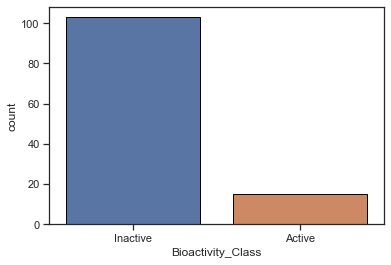

In [51]:
sns.countplot(x='Bioactivity_Class',data=df2_final,edgecolor='black')

Text(0, 0.5, 'LogP')

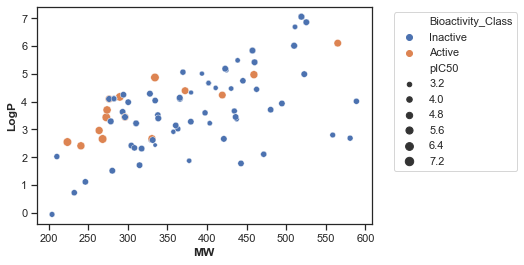

In [59]:
sns.scatterplot(x=df2_final['MW'],y=df2_final['LogP'],hue=df2_final['Bioactivity_Class'],size=df2_final['pIC50'])
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel('MW',fontweight='bold')
plt.ylabel('LogP',fontweight='bold')

#### Its seen that the 2 bioactivity classes are spanning to similar checmical spaces as shown in the graph

<AxesSubplot:xlabel='Bioactivity_Class', ylabel='pIC50'>

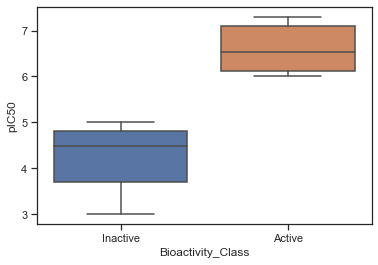

In [63]:
sns.boxplot(x=df2_final['Bioactivity_Class'],y=df2_final['pIC50'])

##### This plot shows the the range of pIC50 values for which the molecules are active and are not active, from 3-5 the molecules are inactive and from the range 6-7 the molecules are active

### Now we analyze the Bioactivity_Class through a statistical lens, we use mann-whitney test to check if they are siginificant difference between these two descriptors

In [87]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'Bioactivity_Class']
    df3 = df2_final[selection]
    active = df3[df3['Bioactivity_Class'] == 'Active']
    active = active[descriptor]

    selection = [descriptor, 'Bioactivity_Class']
    df3 = df2_final[selection]
    inactive = df3[df3['Bioactivity_Class'] == 'Inactive']
    inactive = inactive[descriptor]

# compare samples
    stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [88]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1545.0,4.428384e-10,0.05,Different distribution (reject H0)


#### here we see that the Null hypothesis is being rejected which means that the pIC50, the active and inactive class show statistically siginificant difference 

<AxesSubplot:xlabel='Bioactivity_Class', ylabel='MW'>

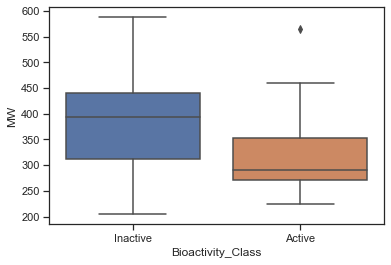

In [89]:
sns.boxplot(x=df2_final['Bioactivity_Class'],y=df2_final['MW'])

In [90]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,408.5,0.003313,0.05,Different distribution (reject H0)


<AxesSubplot:xlabel='Bioactivity_Class', ylabel='LogP'>

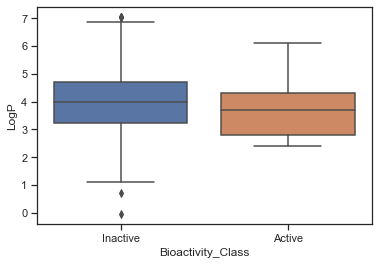

In [91]:
sns.boxplot(x=df2_final['Bioactivity_Class'],y=df2_final['LogP'])

In [92]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.630683,0.05,Same distribution (fail to reject H0)


<AxesSubplot:xlabel='Bioactivity_Class', ylabel='NumHDonors'>

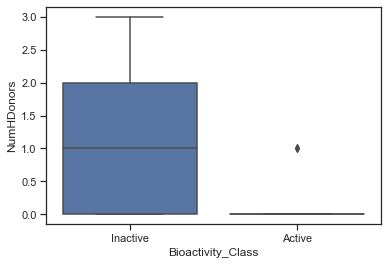

In [93]:
sns.boxplot(x=df2_final['Bioactivity_Class'],y=df2_final['NumHDonors'])

In [95]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,298.5,0.000053,0.05,Different distribution (reject H0)


<AxesSubplot:xlabel='Bioactivity_Class', ylabel='NumHAcceptors'>

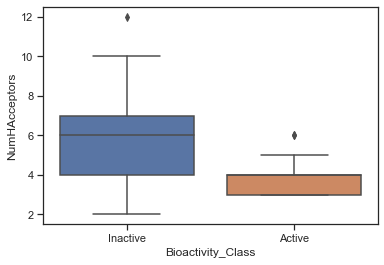

In [96]:
sns.boxplot(x=df2_final['Bioactivity_Class'],y=df2_final['NumHAcceptors'])

In [97]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,414.0,0.003402,0.05,Different distribution (reject H0)


In [ ]:
df2_final.to_csv('Lab2')